<a href="https://colab.research.google.com/github/saisrirao/HDS5210-02-Assignments/blob/main/Week14/week14_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 14 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [35]:
import pandas as pd
from google.colab import files

# Upload the file to Colab
uploaded = files.upload()

# Load the file into a Pandas DataFrame
# Use the name of the uploaded file to read data
# file_name = list(uploaded.keys())[0]
# data = pd.read_excel(r"C:\Users\saisr\OneDrive\Desktop\Air_Quality.xls")
data = pd.read_excel(list(uploaded.keys())[0]) # Changed line

# Display the first few rows of the dataset
print("Data loaded successfully!")
print(data.head())

# Display basic information about the dataset
print("\nDataset Information:")
data.info()

# Number of rows and columns
print("\nShape of the dataset (rows, columns):")
print(data.shape)

Saving Air_Quality.xls to Air_Quality (4).xls
Data loaded successfully!
   Unique ID  Indicator ID                                   Name  \
0     179772           640  Boiler Emissions- Total SO2 Emissions   
1     179785           640  Boiler Emissions- Total SO2 Emissions   
2     178540           365                Fine particles (PM 2.5)   
3     178561           365                Fine particles (PM 2.5)   
4     823217           365                Fine particles (PM 2.5)   

          Measure Measure Info Geo Type Name  Geo Join ID  \
0  Number per km2       number         UHF42        409.0   
1  Number per km2       number         UHF42        209.0   
2            Mean       mcg/m3         UHF42        209.0   
3            Mean       mcg/m3         UHF42        409.0   
4            Mean       mcg/m3         UHF42        409.0   

            Geo Place Name          Time Period           Start_Date  \
0         Southeast Queens                 2015  2015-01-01 00:00:00   
1 

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [36]:
# Unique value count for each column
unique_values = data.nunique()
print("\nUnique values per column:")
print(unique_values)

# Column with the most unique values
most_diverse_column = unique_values.idxmax()
print(f"\nColumn with the most unique values: {most_diverse_column} ({unique_values[most_diverse_column]} unique values)")

# Exclude unique identifiers if applicable (adjust based on your dataset)
excluded_columns = ["Record ID"]  # Replace "Record ID" with the actual column name if applicable
filtered_unique_values = unique_values.drop(index=excluded_columns, errors='ignore')

next_most_diverse_column = filtered_unique_values.idxmax()
print(f"Column with the next most unique values: {next_most_diverse_column} ({filtered_unique_values[next_most_diverse_column]} unique values)")




Unique values per column:
Unique ID         18025
Indicator ID         21
Name                 18
Measure               8
Measure Info          8
Geo Type Name         5
Geo Join ID          72
Geo Place Name      114
Time Period          55
Start_Date           43
Data Value         1147
Message               0
dtype: int64

Column with the most unique values: Unique ID (18025 unique values)
Column with the next most unique values: Unique ID (18025 unique values)


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [37]:
# Columns where all values are the same
redundant_columns = data.columns[data.nunique() == 1]
print("\nColumns with redundant values (all rows have the same value):")
print(redundant_columns.tolist())



Columns with redundant values (all rows have the same value):
[]


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

In [38]:
import matplotlib.pyplot as plt

# Select a numeric column (replace 'ColumnName' with the actual name of a numeric column)
numeric_column = "Blood Pressure"  # Replace with a valid column name
if numeric_column in data.select_dtypes(include='number').columns:
    # Plot histogram
    plt.hist(data[numeric_column], bins=15, color='blue', edgecolor='black')
    plt.title(f"Distribution of {numeric_column}")
    plt.xlabel(numeric_column)
    plt.ylabel("Frequency")
    plt.show()
else:
    print(f"Column '{numeric_column}' is not numeric or doesn't exist in the dataset.")


Column 'Blood Pressure' is not numeric or doesn't exist in the dataset.


### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)


Correlation Matrix:
              Unique ID  Indicator ID  Geo Join ID  Data Value  Message
Unique ID      1.000000      0.062181    -0.002419   -0.020959      NaN
Indicator ID   0.062181      1.000000    -0.040888    0.336881      NaN
Geo Join ID   -0.002419     -0.040888     1.000000   -0.011104      NaN
Data Value    -0.020959      0.336881    -0.011104    1.000000      NaN
Message             NaN           NaN          NaN         NaN      NaN


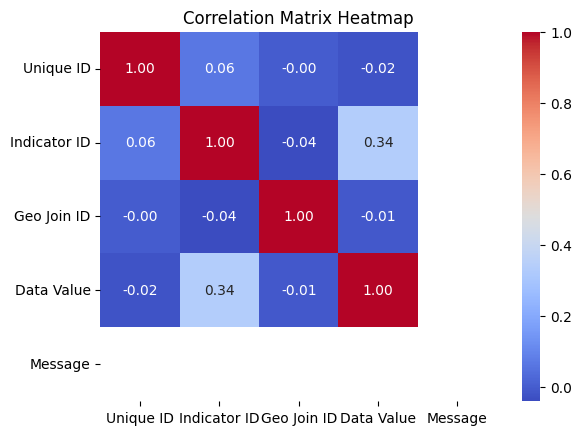


Summary Statistics:
           Unique ID  Indicator ID   Geo Join ID    Data Value  Message
count   18025.000000  18025.000000  1.801600e+04  18025.000000      0.0
mean   426387.692705    434.830180  5.906303e+05     21.428616      NaN
std    250489.450630    115.852371  7.769549e+06     23.999345      NaN
min    121644.000000    365.000000  1.000000e+00      0.000000      NaN
25%    175303.000000    365.000000  2.020000e+02      8.900000      NaN
50%    410803.000000    375.000000  3.030000e+02     15.200000      NaN
75%    649893.000000    386.000000  4.040000e+02     26.700000      NaN
max    828353.000000    661.000000  1.051061e+08    424.700000      NaN


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix for numeric columns
# Include 'numeric_only=True' to only include numerical columns in the correlation calculation
correlation_matrix = data.corr(numeric_only=True)
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Summary statistics for numeric columns
print("\nSummary Statistics:")
print(data.describe())




---



## Submitting Your Work

Submit your work as usual.